# Multiple Linear Regression Assignment(50_Startups)
## Dataset:-50_Startups.csv

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

In [2]:
# Load Dataset
data = pd.read_csv('C:/Users/Hi/Downloads/50_Startups.csv')
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# EDA

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [5]:
data.nunique()

R&D Spend          49
Administration     50
Marketing Spend    48
State               3
Profit             50
dtype: int64

In [6]:
data.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [7]:
data.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

# Data Preprocessing and Visualization

In [8]:
# Renaming some features for the ease of usage 
data = data.rename({'R&D Spend':'RD_spend', 'Administration':'Admin', 'Marketing Spend':'Mkt_spend'}, axis = 1)
data.head()

,RD_spend,Admin,Mkt_spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [9]:
# Checking for duplicate values
data[data.duplicated()]

,RD_spend,Admin,Mkt_spend,State,Profit


C:\Users\Hi\anaconda3ab\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Profit', ylabel='Density'>

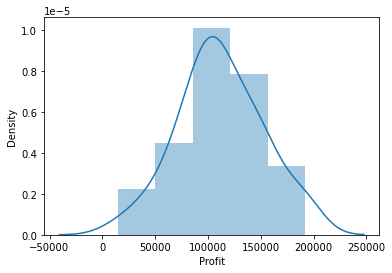

In [10]:
# Histogram of Profit
sns.distplot(data['Profit'], bins = 5, kde=True)

<AxesSubplot:xlabel='State', ylabel='Profit'>

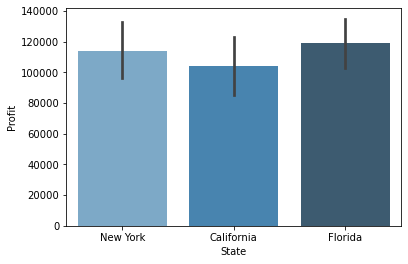

In [11]:
# Profit split in State level
sns.barplot(x='State',y='Profit',data=data, palette="Blues_d")

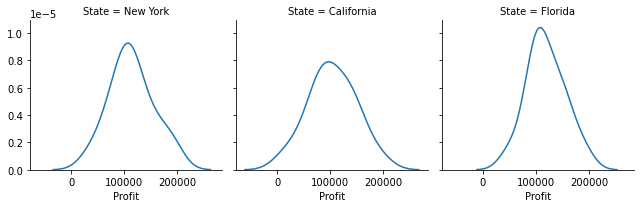

In [12]:
# spread of profit against state 
g=sns.FacetGrid(data, col='State')
g=g.map(sns.kdeplot,'Profit')

In [13]:
# Converting categorical variable into integer values by dummy variables
state_dummy = pd.get_dummies(data['State'], prefix = 'State')
state_dummy

,State_California,State_Florida,State_New York
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,0,1,0
5,0,0,1
6,1,0,0
7,0,1,0
8,0,0,1
9,1,0,0


In [14]:
data = pd.concat([state_dummy, data], axis=1)
data.head()

,State_California,State_Florida,State_New York,RD_spend,Admin,Mkt_spend,State,Profit
0,0,0,1,165349.20,136897.80,471784.10,New York,192261.83
1,1,0,0,162597.70,151377.59,443898.53,California,191792.06
2,0,1,0,153441.51,101145.55,407934.54,Florida,191050.39
3,0,0,1,144372.41,118671.85,383199.62,New York,182901.99
4,0,1,0,142107.34,91391.77,366168.42,Florida,166187.94


In [15]:
data.drop(["State"], inplace=True, axis=1)

In [16]:
data.head()

,State_California,State_Florida,State_New York,RD_spend,Admin,Mkt_spend,Profit
0,0,0,1,165349.20,136897.80,471784.10,192261.83
1,1,0,0,162597.70,151377.59,443898.53,191792.06
2,0,1,0,153441.51,101145.55,407934.54,191050.39
3,0,0,1,144372.41,118671.85,383199.62,182901.99
4,0,1,0,142107.34,91391.77,366168.42,166187.94


In [17]:
data = data.rename({'State_New York':'State_NY'}, axis = 1)
data.head()

,State_California,State_Florida,State_NY,RD_spend,Admin,Mkt_spend,Profit
0,0,0,1,165349.20,136897.80,471784.10,192261.83
1,1,0,0,162597.70,151377.59,443898.53,191792.06
2,0,1,0,153441.51,101145.55,407934.54,191050.39
3,0,0,1,144372.41,118671.85,383199.62,182901.99
4,0,1,0,142107.34,91391.77,366168.42,166187.94


# Correlation Analysis

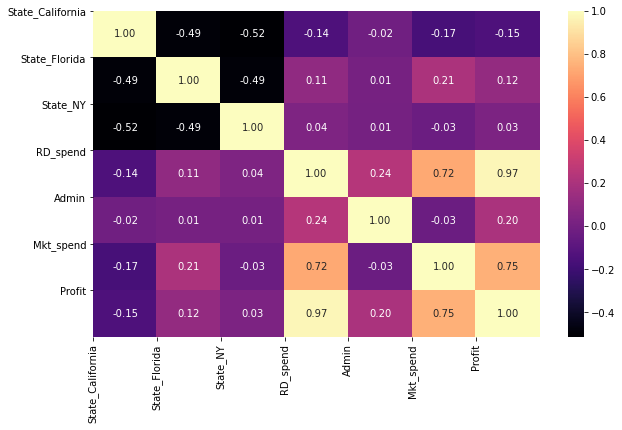

In [18]:
# Correlation analysis for data
corr = data.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(10, 6))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap='magma', annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()

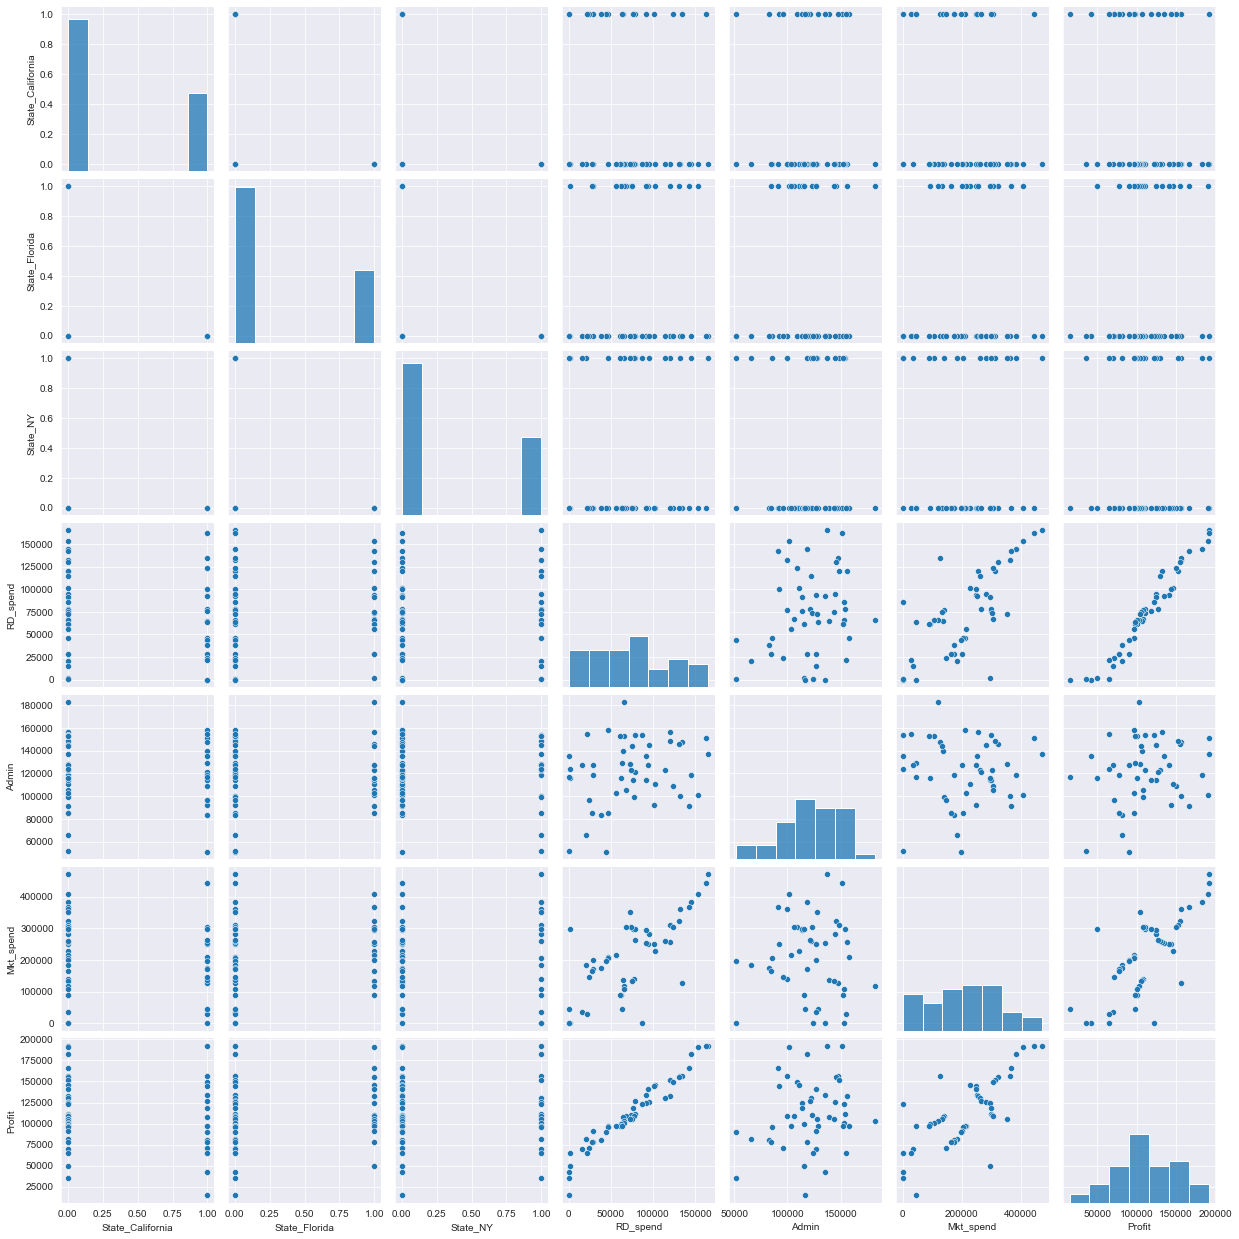

In [19]:
# Pairplot
sns.set_style(style='darkgrid')
sns.pairplot(data)

# Model Building using Statsmodels.formula.api

In [20]:
model=smf.ols("Profit~State_California+State_Florida+State_NY+RD_spend+Admin+Mkt_spend",data=data).fit()

# Fetching Parameters from Model for Testing

In [22]:
# Finding Coefficient parameters
model.params

Intercept           37633.233318
State_California    12492.110514
State_Florida       12690.899307
State_NY            12450.223495
RD_spend                0.806023
Admin                  -0.027004
Mkt_spend               0.026980
dtype: float64

In [23]:
# Finding tvalues and pvalues
print("tvalues")
print(model.tvalues)
print("pvalues")
print(np.round(model.pvalues, 5))

tvalues
Intercept            7.417409
State_California     5.099242
State_Florida        4.654306
State_NY             5.007401
RD_spend            17.368580
Admin               -0.517012
Mkt_spend            1.573889
dtype: float64
pvalues
Intercept           0.00000
State_California    0.00001
State_Florida       0.00003
State_NY            0.00001
RD_spend            0.00000
Admin               0.60774
Mkt_spend           0.12268
dtype: float64


In [24]:
# Finding rsquared values
print("R2: ", model.rsquared)
print("R2_Adj: ", model.rsquared_adj)

R2:  0.9507524843355148
R2_Adj:  0.945156175737278


In [25]:
# Model Profi~Admin
slr_a=smf.ols("Profit~Admin",data=data).fit()
print("tvalu",slr_a.tvalues)
print("pvalue",slr_a.pvalues)
print("R2: ",slr_a.rsquared)
print("R2_Adj: ",slr_a.rsquared_adj)

tvalu Intercept    3.040044
Admin        1.419493
dtype: float64
pvalue Intercept    0.003824
Admin        0.162217
dtype: float64
R2:  0.04028714077757245
R2_Adj:  0.020293122877105274


In [26]:
# Model Profit~Mkt_spend
slr_m=smf.ols("Profit~Mkt_spend",data=data).fit()
print("tvalu",slr_m.tvalues)
print("pvalue",slr_m.pvalues)
print("R2: ",slr_m.rsquared)
print("R2_Adj: ",slr_m.rsquared_adj)

tvalu Intercept    7.808356
Mkt_spend    7.802657
dtype: float64
pvalue Intercept    4.294735e-10
Mkt_spend    4.381073e-10
dtype: float64
R2:  0.5591535746115515
R2_Adj:  0.5499692740826254


In [27]:
mlr_am=smf.ols("Profit~Admin+Mkt_spend",data=data).fit()
print("tvalu",mlr_am.tvalues)
print("pvalue",mlr_am.pvalues)
print("R2: ",mlr_am.rsquared)
print("R2_Adj: ",mlr_am.rsquared_adj)

tvalu Intercept    1.142741
Admin        2.467779
Mkt_spend    8.281039
dtype: float64
pvalue Intercept    2.589341e-01
Admin        1.729198e-02
Mkt_spend    9.727245e-11
dtype: float64
R2:  0.6097229746770663
R2_Adj:  0.593115441684601


# Model Validation

## Checking for collinearity in the features

In [28]:
# Calculating VIF (Variance Inflation Factor) for Predictors

rsq_r=smf.ols("RD_spend~State_California+State_Florida+State_NY+Admin+Mkt_spend",data=data).fit().rsquared
vif_r=1/(1-rsq_r)

rsq_a=smf.ols("Admin~State_California+State_Florida+State_NY+RD_spend+Mkt_spend",data=data).fit().rsquared
vif_a=1/(1-rsq_a)

rsq_m=smf.ols("Mkt_spend~State_California+State_Florida+State_NY+RD_spend+Admin",data=data).fit().rsquared
vif_m=1/(1-rsq_m)

# Putting the values in Dataframe format
d1={'Variables':['RD_spend', 'Admin', 'Mkt_spend'],
    'Vif':[vif_r, vif_a, vif_m]}
Vif_df=pd.DataFrame(d1)
Vif_df

,Variables,Vif
0,RD_spend,2.495511
1,Admin,1.177766
2,Mkt_spend,2.416797


# Residual Analysis

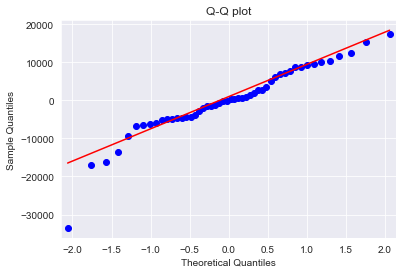

In [29]:
# Checking normality of the residuals with Q-Q plot
sm.qqplot(model.resid,line='q')
plt.title("Q-Q plot")
plt.show()

In [30]:
# Checking for Homoscedasticity of the residuals

# Defining function to calculate Standardized values(Z_score) of model's fitted values and residual values 
def get_stnd_values(value):
    mean = value.mean()
    dev = value.std()
    return((value - mean)/dev)

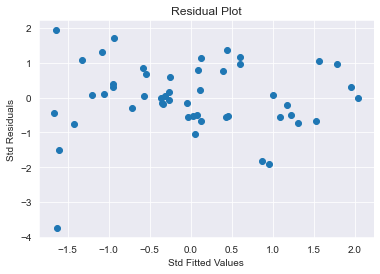

In [31]:
plt.scatter(get_stnd_values(model.fittedvalues),get_stnd_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('Std Fitted Values')
plt.ylabel('Std Residuals')
plt.show()

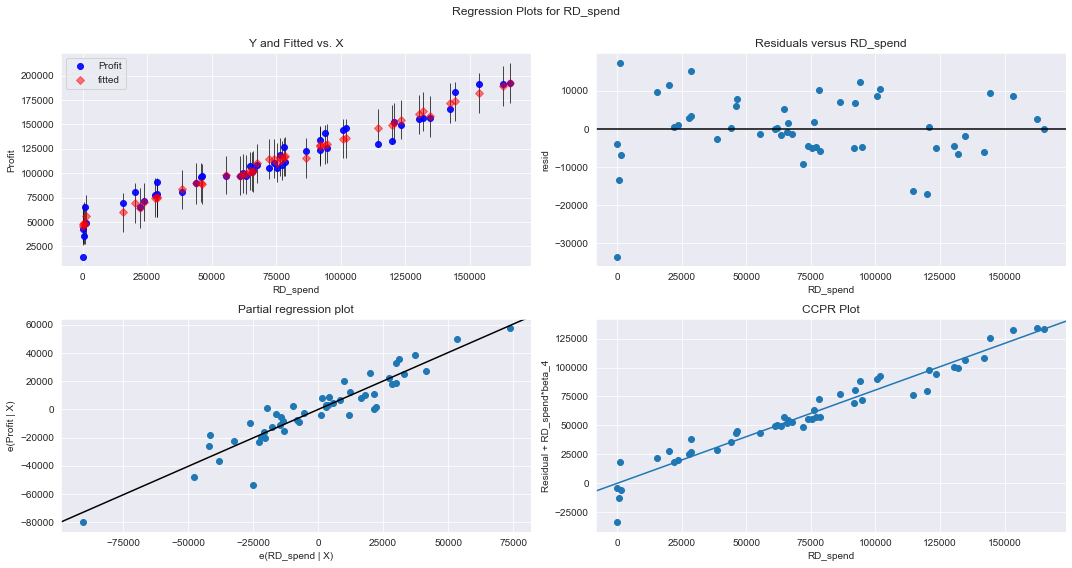

In [32]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'RD_spend',fig=fig)
plt.show()

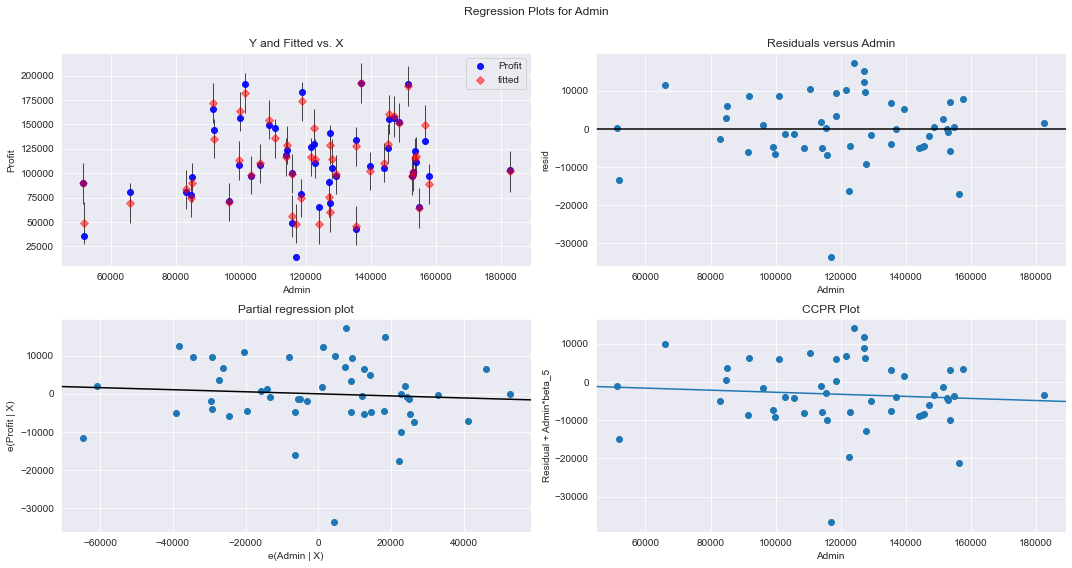

In [33]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Admin',fig=fig)
plt.show()

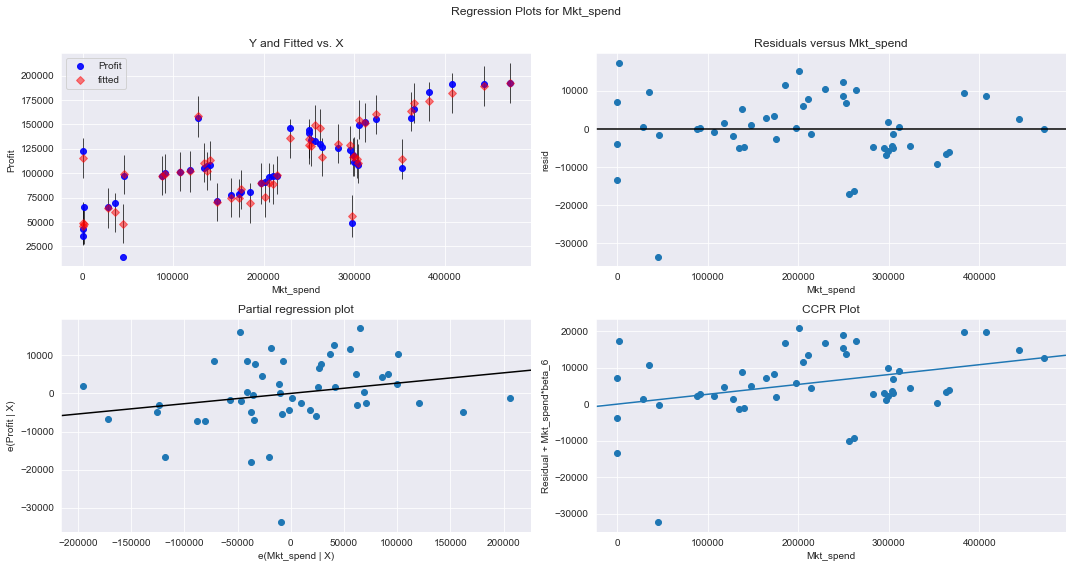

In [34]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Mkt_spend',fig=fig)
plt.show()

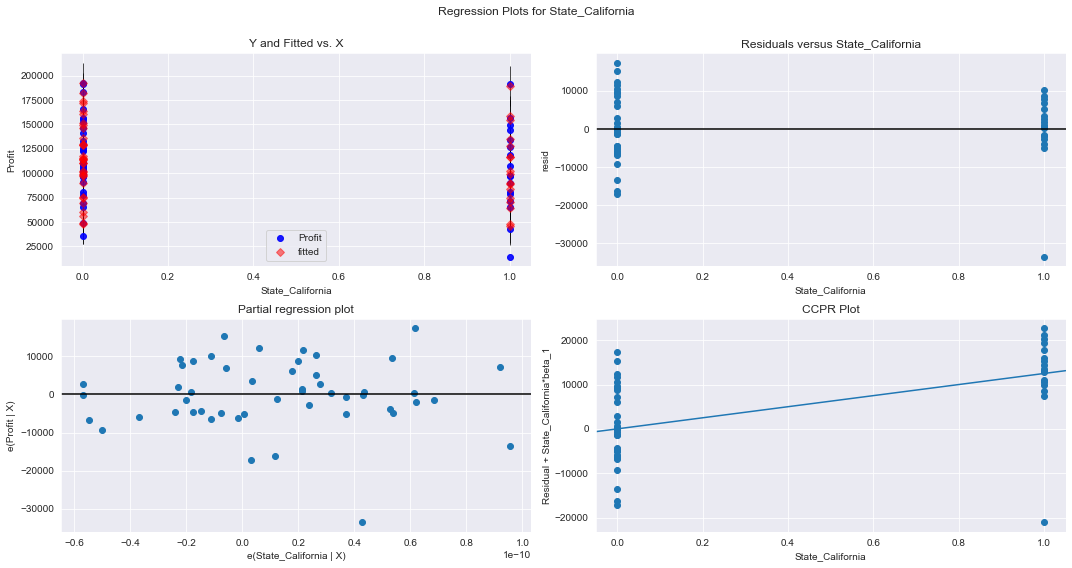

In [35]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'State_California',fig=fig)
plt.show()

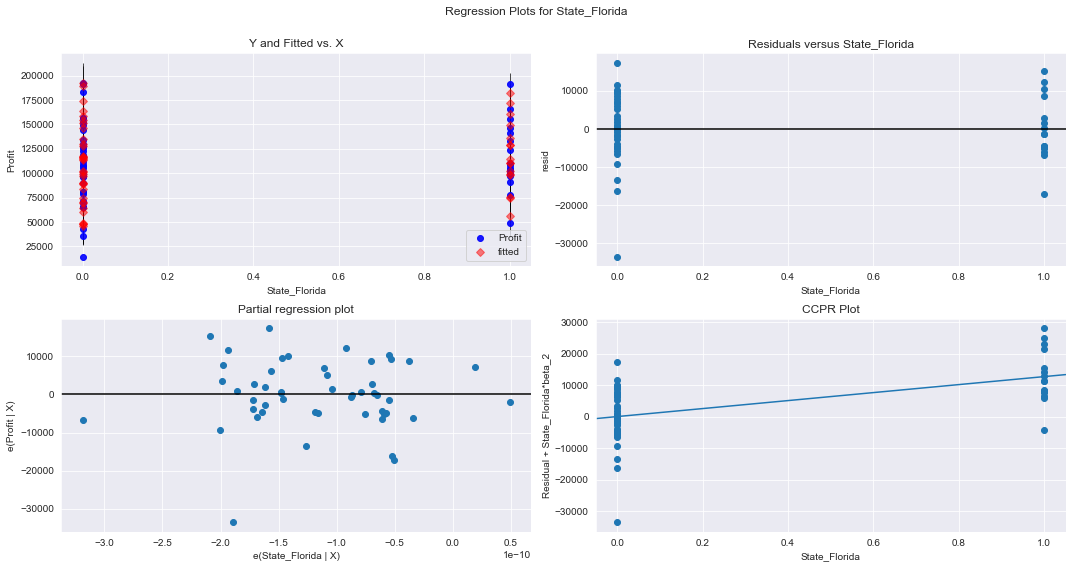

In [36]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'State_Florida',fig=fig)
plt.show()

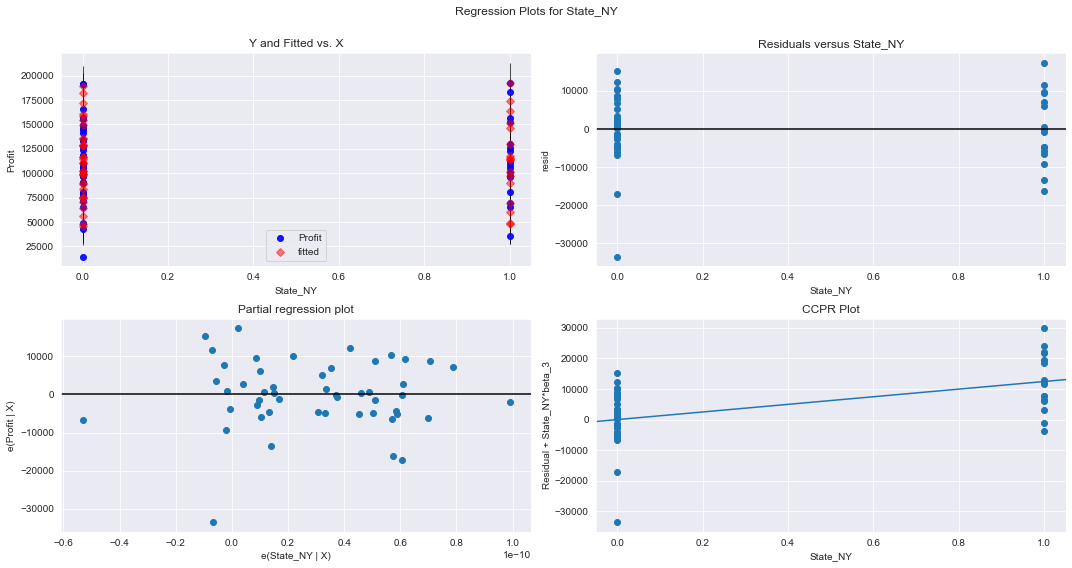

In [37]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'State_NY',fig=fig)
plt.show()

# Model Deletion Diagnostics
## Cook's Distance

In [38]:
(c,_)=model.get_influence().cooks_distance
c

array([6.58235370e-06, 3.39430615e-03, 2.39098625e-02, 2.02032949e-02,
       1.20198420e-02, 1.00370545e-02, 2.13697865e-03, 3.57036535e-03,
       6.25257582e-05, 5.41213369e-03, 1.89764313e-02, 1.65867572e-02,
       1.82797330e-02, 6.34364572e-03, 6.17285106e-02, 3.72134923e-02,
       1.35078103e-02, 3.71193310e-03, 2.94854637e-03, 2.81922632e-02,
       6.02783698e-04, 1.00287995e-02, 3.02178457e-03, 3.16115937e-04,
       4.34597714e-03, 3.56884817e-03, 4.96640589e-03, 2.78597505e-02,
       9.20897922e-04, 9.83021751e-05, 2.28936702e-05, 3.65145586e-06,
       5.61582964e-04, 2.31043413e-04, 1.79909587e-02, 7.13289876e-03,
       5.07832731e-02, 6.16526093e-05, 4.78300794e-02, 1.37854568e-03,
       1.94676476e-03, 1.88154422e-03, 1.42427115e-04, 2.00561912e-02,
       1.00026060e-04, 8.09098154e-02, 3.62771434e-02, 3.84131479e-03,
       1.34036686e-01, 2.26250945e-01])

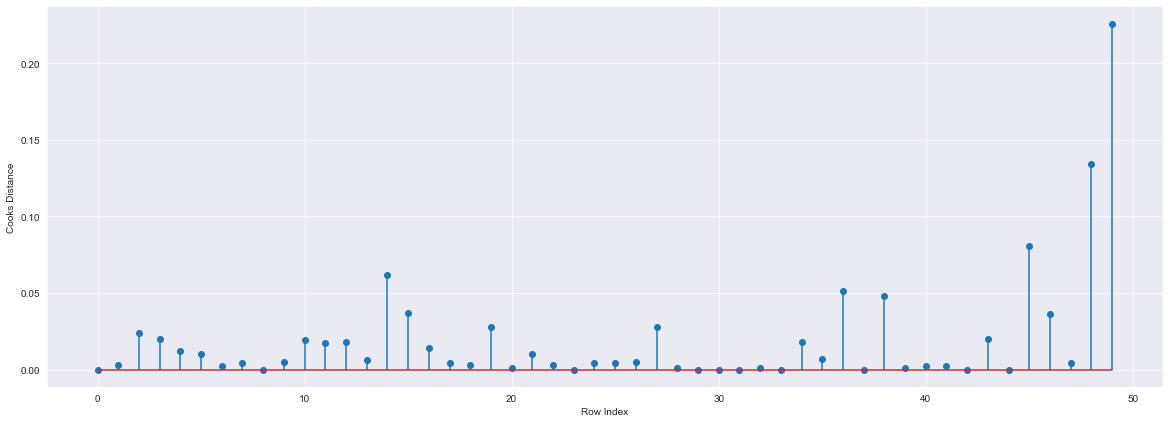

In [39]:
# Plot the influencers using the stem plot
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(data)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [40]:
np.argmax(c) , np.max(c)

(49, 0.2262509450067294)

# Hat Points (Leverage Plot)

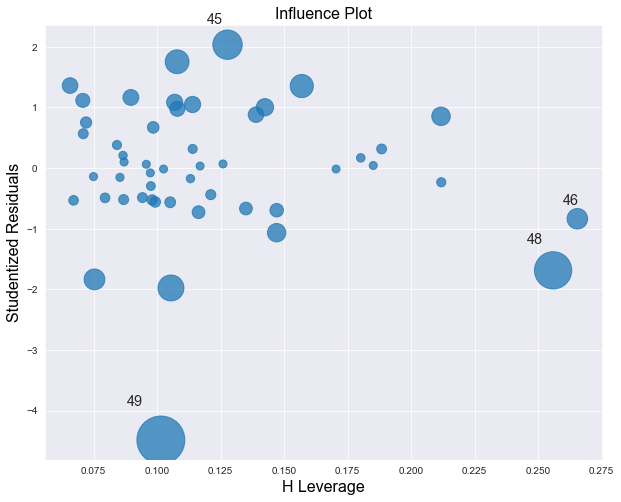

In [41]:
fig,ax=plt.subplots(figsize=(10,8))
fig=influence_plot(model,ax = ax)

In [42]:
# Leverage Cuttoff Value = 3*(k+1)/n ; k = no.of features/columns & n = no. of datapoints
k=data.shape[1]
n=data.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.48

# Model Improvation

In [43]:
# Creating a copy of data so that original dataset is not affected
data_new=data.copy()
data_new

,State_California,State_Florida,State_NY,RD_spend,Admin,Mkt_spend,Profit
0,0,0,1,165349.20,136897.80,471784.10,192261.83
1,1,0,0,162597.70,151377.59,443898.53,191792.06
2,0,1,0,153441.51,101145.55,407934.54,191050.39
3,0,0,1,144372.41,118671.85,383199.62,182901.99
4,0,1,0,142107.34,91391.77,366168.42,166187.94
5,0,0,1,131876.90,99814.71,362861.36,156991.12
6,1,0,0,134615.46,147198.87,127716.82,156122.51
7,0,1,0,130298.13,145530.06,323876.68,155752.60
8,0,0,1,120542.52,148718.95,311613.29,152211.77
9,1,0,0,123334.88,108679.17,304981.62,149759.96


In [44]:
# Discard the data points which are influencers and reassign the row number (reset_index(drop=True))
data_new=data_new.drop(data_new.index[[49]],axis=0).reset_index(drop=True)
data_new

,State_California,State_Florida,State_NY,RD_spend,Admin,Mkt_spend,Profit
0,0,0,1,165349.20,136897.80,471784.10,192261.83
1,1,0,0,162597.70,151377.59,443898.53,191792.06
2,0,1,0,153441.51,101145.55,407934.54,191050.39
3,0,0,1,144372.41,118671.85,383199.62,182901.99
4,0,1,0,142107.34,91391.77,366168.42,166187.94
5,0,0,1,131876.90,99814.71,362861.36,156991.12
6,1,0,0,134615.46,147198.87,127716.82,156122.51
7,0,1,0,130298.13,145530.06,323876.68,155752.60
8,0,0,1,120542.52,148718.95,311613.29,152211.77
9,1,0,0,123334.88,108679.17,304981.62,149759.96


In [45]:
count = 0
model=smf.ols('Profit~State_California+State_Florida+State_NY+RD_spend+Admin+Mkt_spend',data=data_new).fit()
(c,_)=model.get_influence().cooks_distance
c
while np.max(c) > 0.5:
    model=smf.ols('Profit~State_California+State_Florida+State_NY+RD_spend+Admin+Mkt_spend',data=data_new).fit()
    (c,_)=model.get_influence().cooks_distance
    c
    data_new=data_new.drop(data_new.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    data_new
    print(np.argmax(c) , np.max(c))
    count += 1
    print(count)
else:
    final_model=smf.ols('Profit~State_California+State_Florida+State_NY+RD_spend+Admin+Mkt_spend',data=data_new).fit()
    final_model.rsquared , final_model.aic
    print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.9618082858227786


In [46]:
data_new.shape

(49, 7)

# Checking predictions made by model

In [47]:
predicted_profit = final_model.predict(data_new)
pred_df = pd.DataFrame({'Profit_Actual' : data_new.Profit, 'Profit_Predicted' : predicted_profit})
pred_df

,Profit_Actual,Profit_Predicted
0,192261.83,190158.286186
1,191792.06,188917.339414
2,191050.39,180356.022379
3,182901.99,171835.121622
4,166187.94,170611.039177
5,156991.12,161933.895088
6,156122.51,158918.600300
7,155752.60,159073.187405
8,152211.77,150652.118920
9,149759.96,155504.737225


In [48]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(data_new.Profit, predicted_profit))  
print('Mean Squared Error:', metrics.mean_squared_error(data_new.Profit, predicted_profit))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(data_new.Profit, predicted_profit)))
print("R^2 Score :          ", metrics.r2_score(data_new.Profit, predicted_profit))


Mean Absolute Error: 5904.117924685907
Mean Squared Error: 54511358.11008432
Root Mean Squared Error: 7383.180758323902
R^2 Score :           0.9618082858227786


In [49]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     216.6
Date:                Mon, 10 Jan 2022   Prob (F-statistic):           2.51e-29
Time:                        15:53:26   Log-Likelihood:                -505.97
No. Observations:                  49   AIC:                             1024.
Df Residuals:                      43   BIC:                             1035.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         3.915e+04   4249.909      9.213      0.000    3.06e+04    4.77e+04
State_California  1.422e+04   2081.663      6.833      0.000       1e+04    1.84e+04
State_Florida     1.266e+04   2276.728      5.561      0.000    8068.684    1.73e+04
State_NY          1.227e+04   2076.431      5.909      0.000    8082.828    1.65e+04
RD_spend             0.7836      0.039     20.056      0.000       0.705       0.862
Admin               -0.0220      0.044     -0.505      0.616      -0.110       0.066
Mkt_spend            0.0258      0.014      1.804      0.078      -0.003       0.055
==============================================================================
Omnibus:                        0.051   Durbin-Watson:                   1.667
Prob(Omnibus):                  0.975   Jarque-Bera (JB):                0.207
Skew:                           0.061   Prob(JB):                        0.902
Kurtosis:                       2.705   Cond. No.                     1.35e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.13e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# Model Building Using sklearn library

In [50]:
# Importing Libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from collections import Counter
from IPython.core.display import display, HTML
sns.set_style('darkgrid')

In [51]:
data.head()

,State_California,State_Florida,State_NY,RD_spend,Admin,Mkt_spend,Profit
0,0,0,1,165349.20,136897.80,471784.10,192261.83
1,1,0,0,162597.70,151377.59,443898.53,191792.06
2,0,1,0,153441.51,101145.55,407934.54,191050.39
3,0,0,1,144372.41,118671.85,383199.62,182901.99
4,0,1,0,142107.34,91391.77,366168.42,166187.94


# Data Preprocessing for model

In [52]:
# Diving data into Predictors and Target Variable
X = data.drop('Profit', axis = 1).values
y = data.iloc[:,-1].values.reshape(-1,1)

In [53]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [54]:
# Checking splitted sets
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (37, 6)
Shape of X_test:  (13, 6)
Shape of y_train:  (37, 1)
Shape of y_test (13, 1)


In [55]:
regressor_linear = LinearRegression()
regressor_linear.fit(X_train, y_train)

LinearRegression()

# Getting important parameters from model

In [56]:
from sklearn.metrics import r2_score
# Predicting Cross Validation Score the Test set results
cv_linear = cross_val_score(estimator = regressor_linear, X = X_train, y = y_train, cv = 10)

# Predicting R2 Score the Train set results
y_pred_linear_train = regressor_linear.predict(X_train)
r2_score_linear_train = r2_score(y_train, y_pred_linear_train)

# Predicting R2 Score the Test set results
y_pred_linear_test = regressor_linear.predict(X_test)
r2_score_linear_test = r2_score(y_test, y_pred_linear_test)

# Predicting RMSE the Test set results
rmse_linear = (np.sqrt(mean_squared_error(y_test, y_pred_linear_test)))
print("CV: ", cv_linear.mean())
print('R2_score (train): ', r2_score_linear_train)
print('R2_score (test): ', r2_score_linear_test)
print("RMSE: ", rmse_linear)

CV:  0.822377497552212
R2_score (train):  0.9544301945833913
R2_score (test):  0.9190778286373128
RMSE:  9325.8806976115


# Polynomial Regression - 2nd degree

In [57]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X_train)
poly_reg.fit(X_poly, y_train)
regressor_poly2 = LinearRegression()
regressor_poly2.fit(X_poly, y_train)

LinearRegression()

# Getting important parameters from model

In [58]:
# Predicting Cross Validation Score the Test set results
cv_poly2 = cross_val_score(estimator = regressor_poly2, X = X_train, y = y_train, cv = 10)

# Predicting R2 Score the Train set results
y_pred_poly2_train = regressor_poly2.predict(poly_reg.fit_transform(X_train))
r2_score_poly2_train = r2_score(y_train, y_pred_poly2_train)

# Predicting R2 Score the Test set results
y_pred_poly2_test = regressor_poly2.predict(poly_reg.fit_transform(X_test))
r2_score_poly2_test = r2_score(y_test, y_pred_poly2_test)

# Predicting RMSE the Test set results
rmse_poly2 = (np.sqrt(mean_squared_error(y_test, y_pred_poly2_test)))
print('CV: ', cv_poly2.mean())
print('R2_score (train): ', r2_score_poly2_train)
print('R2_score (test): ', r2_score_poly2_test)
print("RMSE: ", rmse_poly2)

CV:  0.822377497552212
R2_score (train):  0.9678999172938763
R2_score (test):  0.8950963304537997
RMSE:  10618.212968223375
